# Makemore

- MLP method: https://www.youtube.com/watch?v=TCH_1BHY58I&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=3
- makemore on github: https://github.com/karpathy/makemore
- jupyter notebook: https://github.com/karpathy/nn-zero-to-hero/blob/master/lectures/makemore/makemore_part2_mlp.ipynb
- collab notebook (new)!!!: https://colab.research.google.com/drive/1YIfmkftLrz6MPTOO9Vwqrop2Q5llHIGK?usp=sharing
- Bengio et al. 2003 MLP language model paper (pdf): https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
import re

def clean_text(text):
    """
    Cleans text for NLP tasks, removing non-Latin characters,
    irrelevant characters, extra whitespace, and converting to lowercase.

    Args:
        text: The input string to clean.

    Returns:
        The cleaned string.
    """

    if not isinstance(text, str):
        return ""

    # 1. Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)

    # 2. Remove email addresses
    text = re.sub(r"[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+", '', text)

    # 3. Remove mentions (@usernames)
    text = re.sub(r"@\S+", '', text)

    # 4. Remove special characters and punctuation (except apostrophes)
    text = re.sub(r"[^\w\s'’]", '', text)

    # 5. Remove numbers (optional)
    # text = re.sub(r"\d+", '', text)

    # 6. Remove extra whitespace
    text = re.sub(r"\s+", ' ', text).strip()

    # 8. Convert to lowercase
    text = text.lower()

    return text

In [ ]:

# Read all the words in the file
# words = open('vietnamese_dataset/sample_vi_full_name.txt', 'r').read().splitlines()
# words = open('vietnamese_dataset/names.txt', 'r').read().splitlines()

words = open('vietnamese_dataset/sample_vi_name.txt', 'r').read().splitlines()
clean_words = [clean_text(word) for word in words]
clean_words[:10] 

['ngoc', 'khuyen', 'huệ', 'kỷ', 'sao', 'uyen', 'hoang', 'xuan', 'tuệ', 'tieu']

In [30]:
len(clean_words)

558

In [33]:
chars = sorted(list(set(''.join(clean_words))))
stoi = {ch: i+1 for i, ch in enumerate(chars)}
stoi['.'] = 0
itos = {i: ch for ch, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'g', 7: 'h', 8: 'i', 9: 'k', 10: 'l', 11: 'm', 12: 'n', 13: 'o', 14: 'p', 15: 'q', 16: 'r', 17: 's', 18: 't', 19: 'u', 20: 'v', 21: 'x', 22: 'y', 23: 'à', 24: 'á', 25: 'â', 26: 'ã', 27: 'ê', 28: 'ì', 29: 'í', 30: 'ð', 31: 'ò', 32: 'ô', 33: 'õ', 34: 'ù', 35: 'ú', 36: 'ý', 37: 'ă', 38: 'đ', 39: 'ĩ', 40: 'ũ', 41: 'ơ', 42: 'ư', 43: 'ạ', 44: 'ả', 45: 'ấ', 46: 'ầ', 47: 'ẩ', 48: 'ẫ', 49: 'ậ', 50: 'ắ', 51: 'ằ', 52: 'ế', 53: 'ề', 54: 'ể', 55: 'ễ', 56: 'ệ', 57: 'ị', 58: 'ọ', 59: 'ố', 60: 'ồ', 61: 'ổ', 62: 'ộ', 63: 'ớ', 64: 'ờ', 65: 'ở', 66: 'ợ', 67: 'ụ', 68: 'ủ', 69: 'ứ', 70: 'ừ', 71: 'ử', 72: 'ữ', 73: 'ự', 74: 'ỳ', 75: 'ỷ', 76: 'ỹ', 0: '.'}


In [34]:
len(itos)

77

In [100]:
# Build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []

for word in clean_words:
    # print(word)
    context = [0]*block_size
    for ch in word+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        # print(''.join([itos[i] for i in context]), '----> ', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [101]:
X.shape, Y.shape, X.dtype, Y.dtype

(torch.Size([2672, 3]), torch.Size([2672]), torch.int64, torch.int64)

In [150]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(clean_words)
n1 = int(0.8*len(clean_words))
n2 = int(0.9*len(clean_words))

Xtr, Ytr = build_dataset(clean_words[:n1])
Xdev, Ydev = build_dataset(clean_words[n1:n2])
Xte, Yte = build_dataset(clean_words[n2:])

torch.Size([2143, 3]) torch.Size([2143])
torch.Size([267, 3]) torch.Size([267])
torch.Size([262, 3]) torch.Size([262])


In [135]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((len(stoi), 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, len(stoi)), generator=g)
b2 = torch.randn(len(stoi), generator=g)
parameters = [C, W1, b1, W2, b2]

In [136]:
sum(p.nelement() for p in parameters)

8631

In [137]:
for p in parameters:
    p.requires_grad = True

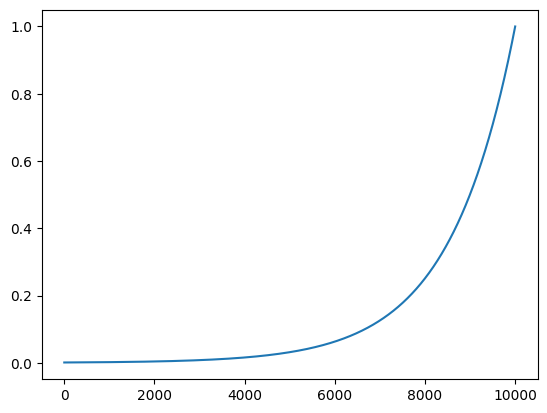

In [171]:
# Obtimize the learning rate
import numpy as np
lre = torch.linspace(-3, 0, 10000) # logarithmic scale from 10^-3 to 10^0, lre = Learning Rate Exponents
lrs = 10**lre # linear scale from 10^-3 to 10^0
plt.plot(np.arange(1, 10001, 1), lrs)

In [139]:
lrs[-1]

tensor(1.)

In [140]:
lri = []
lossi = []

# Forward pass
for i in range(1000):
    
    # minibatch construct
    idx = torch.randint(0, len(Y), (32,)) # lấy ngẫu nhiên 32 index 
    
    emb = C[X[idx]]
    h = torch.tanh((emb.view(-1, 6) @ W1) + b1)
    logits = (h @ W2) + b2
    # counts = logits.exp() # fake counts
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(len(Y)), Y].log().mean()
    loss = F.cross_entropy(logits, Y[idx])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad
    
    lossi.append(loss.item())
    lri.append(lr)

print(loss.item()) # This loss is for only in minibatch


7.226041316986084


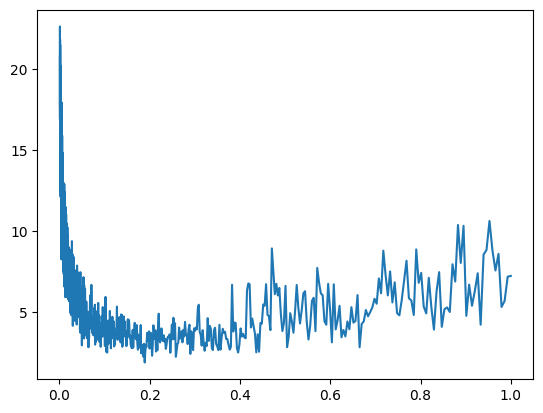

In [141]:
plt.plot(lri, lossi)

Dựa vào biểu đồ trên để xác định 1 giá trị lr để cho loss ổn định, có thể xác định `lr = 0.1` là hợp lý

In [209]:
# re-train với lr = 0.1
from tqdm import tqdm

g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((len(stoi), 10), generator=g)
W1 = torch.randn((30, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, len(stoi)), generator=g)
b2 = torch.randn(len(stoi), generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True


stepi = []
lossi = []
# lri = []

# Forward pass
for i in tqdm(range(10000)):
    
    # minibatch construct
    idx = torch.randint(0, len(Ytr), (32,)) # lấy ngẫu nhiên 32 index 
    
    emb = C[Xtr[idx]]
    h = torch.tanh((emb.view(-1, 30) @ W1) + b1)
    logits = (h @ W2) + b2
    # counts = logits.exp() # fake counts
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(len(Y)), Y].log().mean()
    loss = F.cross_entropy(logits, Ytr[idx])
    # print(loss.item())
    
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    
    # update weights
    # lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad
    
    lossi.append(loss.item())
    stepi.append(i)
    # lri.append(lr)

print(loss.item()) # This loss is for only in minibatch


100%|██████████| 10000/10000 [00:06<00:00, 1469.01it/s]

1.3619645833969116


In [210]:
# plt.plot(lri, lossi)

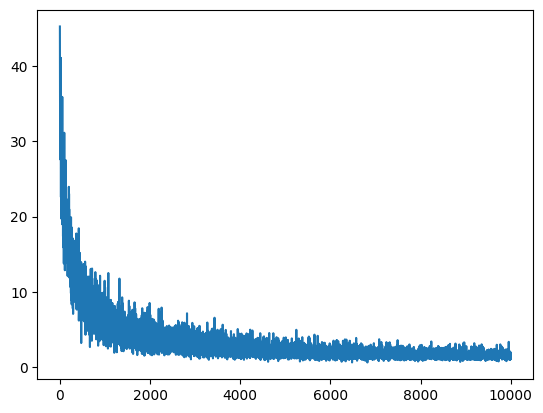

In [211]:
plt.plot(stepi, lossi, label='lr=0.01')

In [212]:
# Caculate the loss for the whole dataset
emb = C[Xtr]
h = torch.tanh((emb.view(-1, 30) @ W1) + b1)
logits = (h @ W2) + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

1.5307304859161377


In [213]:
# Caculate the loss for the whole dataset
emb = C[Xdev]
h = torch.tanh((emb.view(-1, 30) @ W1) + b1)
logits = (h @ W2) + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

5.450994968414307


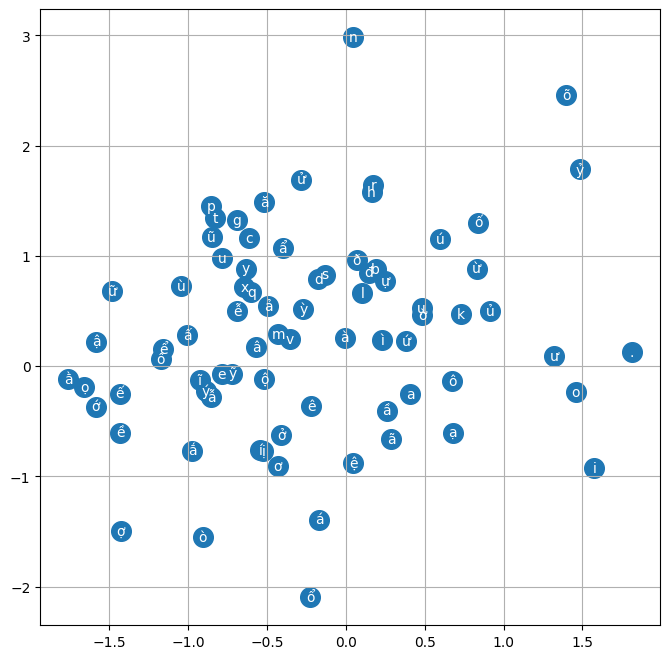

In [199]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [214]:
# sample from the model
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

lxn.
dong.
man.
dieu.
hanh.
kú.
thuy.
thúc.
kiều.
hưng.
duong.
xuan.
nghiệu.
duc.
khoi.
thúc.
trâm.
khng.
thủy.
tong.
